# 問題1：練習のために特徴量とカテゴリを選択

In [133]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [64]:
iris_dataset = load_iris()
# iris_dataset

iris_data_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
target_iris_df = pd.DataFrame(iris_dataset.target)

# iris_data_df
# target_iris_df
iris_df = pd.concat([iris_data_df, target_iris_df], axis=1)
iris_df = iris_df.rename(columns={0:"species"})
# iris_df

# Extract 'virgicolor'(species=1) and 'virginica'(species=2)
data_virs = iris_df[iris_df['species'].isin(['1','2'])]
# data_virs

data_length = data_virs[["sepal length (cm)", "petal length (cm)"]]
# data_length

data_length_df = pd.concat([data_length, data_virs.species], axis=1)
data_length_df

,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
55,5.7,4.5,1
56,6.3,4.7,1
57,4.9,3.3,1
58,6.6,4.6,1
59,5.2,3.9,1


___
# 問題2：データの分析

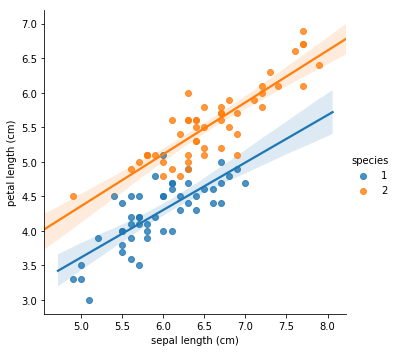

In [65]:
sns.lmplot(data=data_length_df, x="sepal length (cm)", y="petal length (cm)", hue="species")

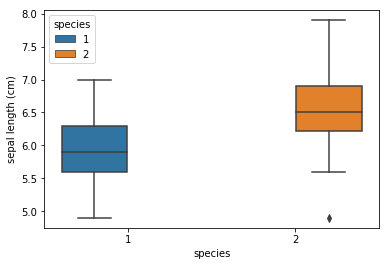

In [70]:
sns.boxplot(data=data_length_df, x="species", y="sepal length (cm)", hue="species")

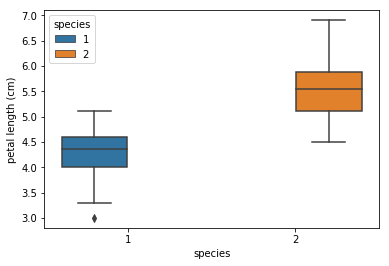

In [71]:
sns.boxplot(data=data_length_df, x="species", y="petal length (cm)", hue="species")

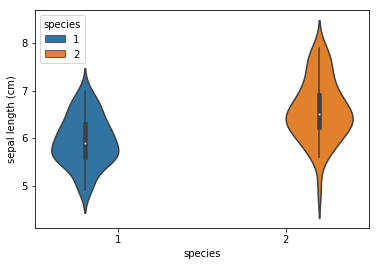

In [72]:
sns.violinplot(data=data_length_df, x="species", y="sepal length (cm)", hue="species")

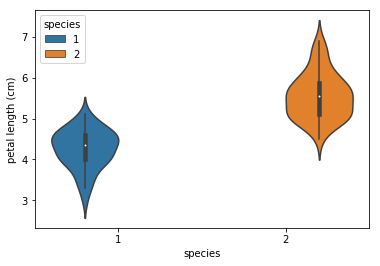

In [73]:
sns.violinplot(data=data_length_df, x="species", y="petal length (cm)", hue="species")

___
# 問題3：前処理・訓練用データと検証用データの分割

In [84]:
X = np.array(data_length_df.iloc[:, 0:2])
y = np.array(data_length_df.species)

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

___
# 問題４：前処理・標準化

In [94]:
sc = StandardScaler()
sc.fit(x_train)

x_train_trans = sc.transform(x_train)
x_test_trans = sc.transform(x_test)

# K-Nearest Neighbors

print("5-nn --------------------------")
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train_trans, y_train)
neigh.predict(x_test_trans)
neigh.score(x_test_trans, y_test)

5-nn --------------------------


0.96

In [95]:
print("1-nn --------------------------")
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train_trans, y_train)
neigh.predict(x_test_trans)
neigh.score(x_test_trans, y_test)

1-nn --------------------------


0.88

In [96]:
print("3-nn --------------------------")
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_trans, y_train)
neigh.predict(x_test_trans)
neigh.score(x_test_trans, y_test)

3-nn --------------------------


0.92

___
# 問題６：評価

In [105]:
# Accuracy score

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train_trans, y_train)
y_pred = neigh.predict(x_test_trans)
print(x_pred)
print(y_test)
accuracy_score(y_test, y_pred)

[2 1 1 2 2 1 2 2 1 1 1 2 1 2 2 2 2 2 1 2 1 1 1 2 1]
[2 1 1 2 2 1 2 2 1 2 1 2 1 2 2 2 2 2 1 2 1 1 1 2 1]


0.96

In [112]:
# Precision score
precision_score(y_test, y_pred, average="macro")

0.9583333333333333

In [114]:
precision_score(y_test, y_pred, average="micro")

0.96

In [116]:
precision_score(y_test, y_pred, average="binary")

0.9166666666666666

In [118]:
precision_score(y_test, y_pred, average="weighted")

0.9633333333333333

In [123]:
# Recall score
recall_score(y_test, y_pred, average="macro")

0.9642857142857143

In [124]:
recall_score(y_test, y_pred, average="micro")

0.96

In [125]:
recall_score(y_test, y_pred, average="binary")

1.0

In [126]:
recall_score(y_test, y_pred, average="weighted")

0.96

In [129]:
# F1 score
f1_score(y_test, y_pred, average="macro")

0.9597423510466989

In [130]:
f1_score(y_test, y_pred, average="micro")

0.96

In [131]:
f1_score(y_test, y_pred, average="binary")

0.9565217391304348

In [132]:
f1_score(y_test, y_pred, average="weighted")

0.9601288244766506

In [134]:
# Confusion matrix

confusion_matrix(y_test, y_pred)

array([[11,  0],
       [ 1, 13]])

### [4つの指標の意味]
（TP：真を真と予測、TN：偽を偽と予測、FP：偽を真と予測、FN：真を偽と予測）  
1. Accuracy（正解率）  
予測の正確さ。  
混同行列のTPとTNの割合を示す。  
数値が高いほど、性能が良いとされる。
$$
\frac{TP+TN}{TP+TN+FP+FN}
$$
2. Precision（適合率）  
正しいと予測したもののうち、実際に正しいものがどれだけあったかの割合（実際に偽であるものがどれだけあったかの割合とも言える）。  
混同行列のTPとFPに対し、TPの割合を示す。  
数値が高いほど、性能が良いとされる。
$$
\frac{TP}{TP+FP}
$$
3. Recall（再現性）  
真であるデータをどれだけ真と予測できているかの割合（実際は真であるが、偽と予測してしまう割合とも言える）。  
混同行列のTPとFNに対し、TPの割合を示す。  
数値が高いほど、性能が良いとされる。
$$
\frac{TP}{TP+FN}
$$  
4. F値（P：Precisionの値、R：Recallの値）  
あるモデルの予測結果全体に、どれだけ間違った予測（FPとFN）が含まれているかを表す。  
値は 0<=F<=1 であり、１に近づけば近づくほど、良い結果となる。  
すなわち、間違った予測が０件になれば、F値は１となる。
$$
\frac{2PR}{P+R}
$$